<a href="https://colab.research.google.com/github/luegl/keras-distinguish-own-cat-from-others-model/blob/main/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import libraries

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import layers, callbacks
import tensorflow as tf

Setup for image preprocessing and augmentation with
ImageDataGenerator, including resizing, normalization, and various augmentation techniques.


In [3]:
IMG_SIZE = (180, 180)
IMG_SIZE_ = 180
BATCH_SIZE = 16

datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode="nearest"
)

The train_generator loads images from the specified directory, resizes them, processes them in batches, and prepares them for binary classification using the training subset. It does not store all images, only those that are currently needed.

In [5]:
train_generator = datagen.flow_from_directory(
    "drive/MyDrive/datasets/dataset_fla_other/preprocessed_images",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="training"
)

Found 288 images belonging to 2 classes.


The val_generator loads images from the specified directory, resizes them, processes them in batches, and prepares them for binary classification using the validation subset. It does not store all images, only those that are currently needed.

In [6]:
val_generator = datagen.flow_from_directory(
    "drive/MyDrive/datasets/dataset_fla_other/preprocessed_images",
    target_size= IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    subset="validation"
)

Found 70 images belonging to 2 classes.


Prints class labels and displays a batch of images with their corresponding labels in a grid.

Class names: {'flaekli': 0, 'other_cats': 1}


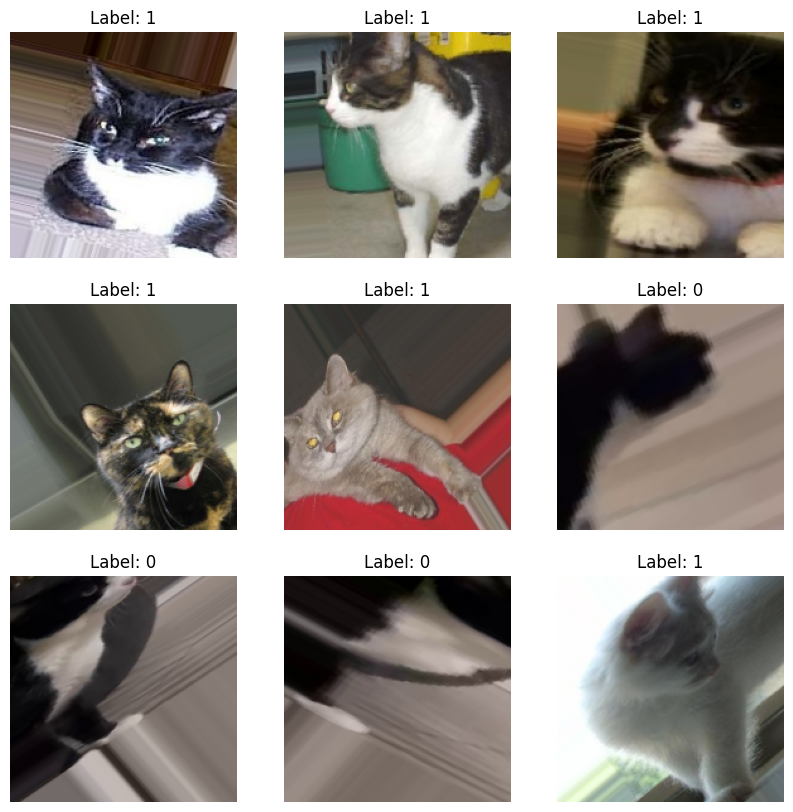

In [7]:
print("Class names:", train_generator.class_indices)

images, labels = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(min(9, BATCH_SIZE)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {int(labels[i])}")
    plt.axis("off")
plt.show()

Build model


In [8]:
base_model = keras.applications.MobileNetV2(input_shape=(IMG_SIZE_, IMG_SIZE_, 3), include_top=False, weights="imagenet")
base_model.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=base_model.input, outputs=x)


model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

#checkpoint = callbacks.ModelCheckpoint("cat_model.keras", save_best_only=False, monitor="val_loss")

<ipython-input-8-2726817bd12f>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNetV2(input_shape=(IMG_SIZE_, IMG_SIZE_, 3), include_top=False, weights="imagenet")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Train model


In [9]:
model.fit(train_generator, validation_data=val_generator, epochs=5)

model_path = "/content/drive/MyDrive/repos/keras-distinguish-own-cat-from-others-model/models/model1.keras"

model.save(model_path, save_format="keras")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.8570 - loss: 0.3407 - val_accuracy: 0.9429 - val_loss: 0.1366
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 796ms/step - accuracy: 0.9325 - loss: 0.1462 - val_accuracy: 0.8857 - val_loss: 0.3470
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 785ms/step - accuracy: 0.9036 - loss: 0.2047 - val_accuracy: 0.9429 - val_loss: 0.1471
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 766ms/step - accuracy: 0.9805 - loss: 0.0516 - val_accuracy: 0.9286 - val_loss: 0.2260
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 902ms/step - accuracy: 0.9700 - loss: 0.1159 - val_accuracy: 0.9714 - val_loss: 0.0951


Test model

In [10]:
model = tf.keras.models.load_model(model_path)

loss, accuracy = model.evaluate(val_generator)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 402ms/step - accuracy: 0.9298 - loss: 0.1727
Test Loss: 0.21171784400939941
Test Accuracy: 0.9142857193946838
